In [1]:
# install more recent version of seaborn to prevent fault that causes sns subplots to not render correctly
!pip install seaborn==0.10.0 --quiet

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

### Read in cleaned GCP data

In [3]:
df_gcp = pd.read_csv('df_gcp.csv')

In [4]:
df_gcp.head()

,Unnamed: 0,lga_code,lga_name,total_women,median_fam_inc_weekly,pcent_women_employed,pcent_women_high_income,pcent_women_tertiary_educ,studios_per_10000_women
0,0,20110,Alpine (S),6265,1322,50.4,26.671987,25.618516,0.000000
1,1,20260,Ararat (RC),5449,1263,48.4,27.032483,20.866214,0.000000
2,2,20570,Ballarat (C),52821,1489,50.8,28.746143,25.217243,0.567956
3,3,20660,Banyule (C),62644,2033,54.9,35.404827,36.423281,1.755954
4,4,20740,Bass Coast (S),16912,1192,42.4,23.409413,22.416036,0.000000


In [5]:
df_gcp.drop('Unnamed: 0', axis = 1, inplace = True)

print('Shape:', df_gcp.shape)
df_gcp.head()

Shape: (79, 8)


,lga_code,lga_name,total_women,median_fam_inc_weekly,pcent_women_employed,pcent_women_high_income,pcent_women_tertiary_educ,studios_per_10000_women
0,20110,Alpine (S),6265,1322,50.4,26.671987,25.618516,0.000000
1,20260,Ararat (RC),5449,1263,48.4,27.032483,20.866214,0.000000
2,20570,Ballarat (C),52821,1489,50.8,28.746143,25.217243,0.567956
3,20660,Banyule (C),62644,2033,54.9,35.404827,36.423281,1.755954
4,20740,Bass Coast (S),16912,1192,42.4,23.409413,22.416036,0.000000


### Calculate descriptive statistics for each feature

First define feature list and colour list to help with plotting

In [6]:
df_stats = df_gcp.describe()
df_stats

,lga_code,total_women,median_fam_inc_weekly,pcent_women_employed,pcent_women_high_income,pcent_women_tertiary_educ,studios_per_10000_women
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,24030.632911,38163.708861,1597.620253,50.464557,29.351893,26.825299,1.270822
std,2165.418975,34996.592896,390.833997,5.378805,5.939207,9.175329,1.923725
min,20110.000000,1527.000000,1001.000000,36.800000,19.711246,14.513678,0.000000
25%,22210.000000,8137.500000,1321.000000,46.600000,25.544560,20.645817,0.000000
50%,24210.000000,22932.000000,1486.000000,50.700000,27.640082,23.250862,0.322508
75%,25945.000000,65596.500000,1814.500000,53.900000,32.228716,31.890511,1.842570
max,27630.000000,150274.000000,2765.000000,63.900000,50.481935,51.829938,8.802817


In [7]:
def print_variability(feature, name_tabs, value_tabs):
    print(feature, name_tabs,
      round(df_stats.loc['25%', feature], 1), 'to',
      round(df_stats.loc['75%', feature], 1), value_tabs,
      round(df_stats.loc['min', feature], 1),
      round(df_stats.loc['max', feature], 1))

print("\t\t\t\t MIDDLE 50% OF VALUES\t RANGE (MIN TO MAX)")

print_variability('median_fam_inc_weekly', '\t\t', '\t')
print_variability('pcent_women_employed', '\t\t', '\t\t')
print_variability('pcent_women_high_income', '\t', '\t\t')
print_variability('pcent_women_tertiary_educ', '\t', '\t\t')

				 MIDDLE 50% OF VALUES	 RANGE (MIN TO MAX)
median_fam_inc_weekly 		 1321.0 to 1814.5 	 1001.0 2765.0
pcent_women_employed 		 46.6 to 53.9 		 36.8 63.9
pcent_women_high_income 	 25.5 to 32.2 		 19.7 50.5
pcent_women_tertiary_educ 	 20.6 to 31.9 		 14.5 51.8


Observations

Overall, the range for each feature is large, indicating a great difference in demographics from LGA to LGA. 
The middle 50, which represents the interquartile range, is also moderate to fairly large for each feature.

The high variability of all of the features suggests that these are appropriate features to have been selected for the problem at hand, as they may be determining factors in the number and location of yoga/pilates studios. If the variability had been low, then these features would have been less likely to have an effect on the yoga/pilates market.

### Show why mean +/- std isn't the appropriate measure of spread

Most of the features are skewed, invalidating the middle-68 assumption of mean +/- std.

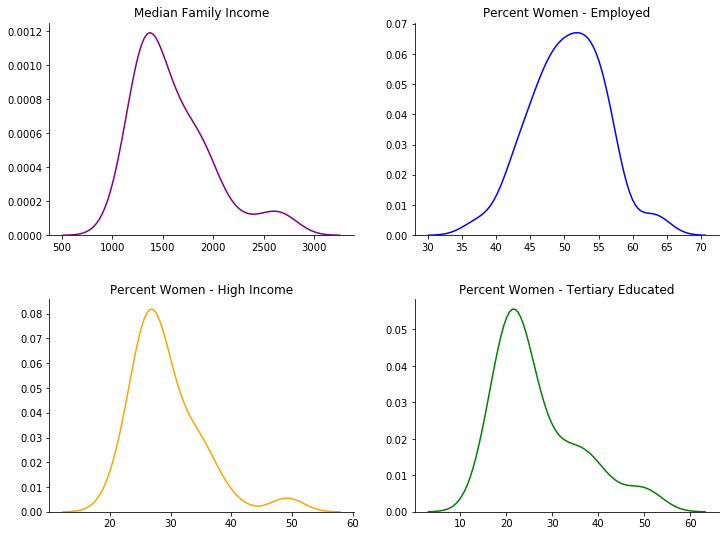

In [8]:
fig_dist = plt.figure(figsize = (12, 9))

ax1 = fig_dist.add_subplot(221, title = "Median Family Income")
ax2 = fig_dist.add_subplot(222, title = "Percent Women - Employed")
ax3 = fig_dist.add_subplot(223, title = "Percent Women - High Income")
ax4 = fig_dist.add_subplot(224, title = "Percent Women - Tertiary Educated")

axes = [ax1, ax2, ax3, ax4]
feature_list = ['median_fam_inc_weekly', 'pcent_women_employed', 'pcent_women_high_income', 'pcent_women_tertiary_educ']
colours = ['purple', 'blue', 'orange', 'green']

plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
sns.despine(fig = fig_dist)

for i in range(len(feature_list)):
    sns.distplot(df_gcp[feature_list[i]], ax = axes[i], hist = False, axlabel = False, color = colours[i])

fig_dist.show()

Observation: The percent women employed is symmetrical, but the other features are not. Hence it is appropriate to use the quartiles to assess spread, as these are less sensitive to skew.

This is confirmed by computing the skew for each feature. The skewness around 0 indicates a normal distribution. A skewness away from 0 indicates skew.

In [9]:
print('SKEWNESS')
print('Median family income\t\t\t', round(skew(df_gcp['median_fam_inc_weekly']), 3))
print('Percent women - employed\t\t', round(skew(df_gcp['pcent_women_employed']), 3))
print('Percent women - high income\t\t', round(skew(df_gcp['pcent_women_high_income']), 3))
print('Percent women - tertiary educated\t', round(skew(df_gcp['pcent_women_tertiary_educ']), 3))

SKEWNESS
Median family income			 1.188
Percent women - employed		 -0.035
Percent women - high income		 1.483
Percent women - tertiary educated	 1.116


This confirms that all features, bar one, are skewed. Therefore the assumption of normality is invalid.

### Visualise correlations between features and number of studios per 10000 women

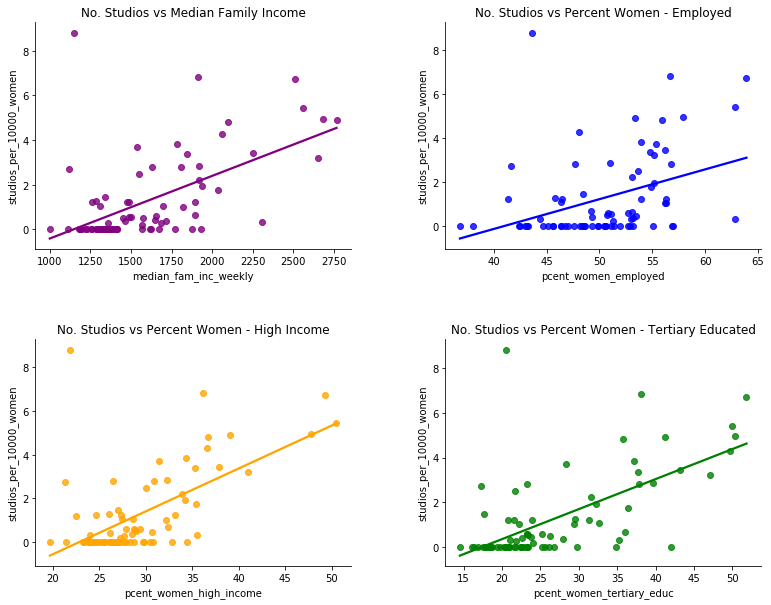

In [10]:
fig_scatter = plt.figure(figsize = (13, 10))

ax1 = fig_scatter.add_subplot(221, title = "No. Studios vs Median Family Income")
ax2 = fig_scatter.add_subplot(222, title = "No. Studios vs Percent Women - Employed")
ax3 = fig_scatter.add_subplot(223, title = "No. Studios vs Percent Women - High Income")
ax4 = fig_scatter.add_subplot(224, title = "No. Studios vs Percent Women - Tertiary Educated")

axes = [ax1, ax2, ax3, ax4]

plt.subplots_adjust(wspace = 0.3, hspace = 0.4)
sns.despine(fig = fig_scatter)

for i in range(len(feature_list)):
    sns.regplot(data = df_gcp, x = feature_list[i], y = 'studios_per_10000_women',
                ax = axes[i], ci = None, color = colours[i])

fig_scatter.show()

Observations:

Correlation visible in all four features, but extent is not clear. Need mathematical confirmation.

### Confirm correlations between features and number of studios in an LGA

In [11]:
feature_names = ['median_fam_inc_weekly', 'pcent_women_employed', 'pcent_women_high_income', 'pcent_women_tertiary_educ']

df_gcp[feature_names].corrwith(df_gcp['studios_per_10000_women']).round(3)

median_fam_inc_weekly        0.570
pcent_women_employed         0.381
pcent_women_high_income      0.609
pcent_women_tertiary_educ    0.639
dtype: float64

Observations:

Moderate correlation between the following features and num studios per 10000 women:

- median family income
- percent women high income
- percent women tertiary educated

Weak correlation between the following feature and num studios per 10000 women:

- percent women employed

So, the percentage of women employed may *not* be a determining factor in the number of studios present in a LGA. This may be because many women in Australia, who are in dual-income households, do not do paid work; they are in an arrangement where a male partner is the breadwinner and the female is responsible for childrearing. If the male partner's income is high enough, then the woman would be able to afford participation in yoga/pilates, thereby invalidating the assumption that a women must be earning *her own* money in order to participate in these activities.